In [10]:

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [12]:
ab = pd.read_csv(r'C:\Users\YUVRA\Desktop\PS.csv')
ab.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Age_Group_NUMBER,Customer_Gender,Country,Product_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,01-01-17,1,January,2017,17,Youth (<25),1,M,canada,Bikes,2,1519.0,2443.0,1848.0,3038.0,4886.0
1,01-01-17,1,January,2017,23,Youth (<25),1,M,Australia,Bikes,2,1252.0,2295.0,2086.0,2504.0,4590.0
2,01-01-17,1,January,2017,33,Young Adults (25-34),1,F,France,Bikes,2,2171.0,3578.0,2814.0,4342.0,7156.0
3,01-01-17,1,January,2017,39,Adults (35-64),1,M,United States,Bikes,2,713.0,1120.0,814.0,1426.0,2240.0
4,01-01-17,1,January,2017,42,Adults (35-64),1,M,United States,Bikes,2,344.0,540.0,392.0,688.0,1080.0


In [3]:
#Checking the shape of the dataset
ab.shape

(113036, 16)

In [4]:
# Exploring the dataset information
ab.info

<bound method DataFrame.info of             Date  Day     Month  Year  Customer_Age             Age_Group  \
0       01-01-17    1   January  2017            17           Youth (<25)   
1       01-01-17    1   January  2017            23           Youth (<25)   
2       01-01-17    1   January  2017            33  Young Adults (25-34)   
3       01-01-17    1   January  2017            39        Adults (35-64)   
4       01-01-17    1   January  2017            42        Adults (35-64)   
...          ...  ...       ...   ...           ...                   ...   
113031  31-12-21   31  December  2021            52        Adults (35-64)   
113032  31-12-21   31  December  2021            25  Young Adults (25-34)   
113033  31-12-21   31  December  2021            26  Young Adults (25-34)   
113034  31-12-21   31  December  2021            33  Young Adults (25-34)   
113035  31-12-21   31  December  2021            44        Adults (35-64)   

        Age_Group_NUMBER Customer_Gender   

In [5]:
##Changing the Column year to a string
ab['Year']=ab['Year'].astype(str)
ab['Year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 113036 entries, 0 to 113035
Series name: Year
Non-Null Count   Dtype 
--------------   ----- 
113036 non-null  object
dtypes: object(1)
memory usage: 883.2+ KB


In [7]:
print(ab['Year'].dtype)

object


In [8]:
##Changing the Column day to a string
ab['Day']=ab['Day'].astype(str)
ab['Day'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 113036 entries, 0 to 113035
Series name: Day
Non-Null Count   Dtype 
--------------   ----- 
113036 non-null  object
dtypes: object(1)
memory usage: 883.2+ KB


In [9]:
#Exploring the statistics metrics
ab.describe().round(2).style.format(precision=2).background_gradient(cmap="Greens")

,Customer_Age,Age_Group_NUMBER,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.00,113036.00,113036.00,113036.00,113036.00,113036.00,113036.00,113036.00
mean,35.92,1.00,11.90,267.30,452.94,372.68,469.32,842.00
std,11.02,0.00,9.56,549.84,922.07,595.08,884.87,1466.20
min,17.00,1.00,1.00,1.00,2.00,1.00,1.00,2.00
25%,28.00,1.00,2.00,2.00,5.00,39.00,28.00,70.00
50%,35.00,1.00,10.00,9.00,24.00,135.00,108.00,245.00
75%,43.00,1.00,20.00,42.00,70.00,432.00,432.00,880.00
max,87.00,1.00,32.00,2171.00,3578.00,26158.00,42978.00,69136.00


In [10]:
#Checking for null values
ab.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Age_Group_NUMBER    0
Customer_Gender     0
Country             0
Product_Category    0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [11]:
#Listing the columns in the dataset
ab.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Age_Group_NUMBER', 'Customer_Gender', 'Country', 'Product_Category',
       'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost',
       'Revenue'],
      dtype='object')

### How is the Customer Gender ratio?

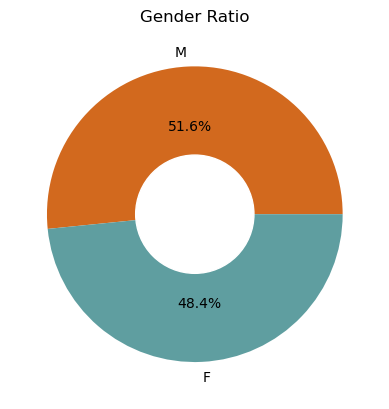

In [28]:
Gender=ab['Customer_Gender'].value_counts()
#create a pie chart
plt.pie(Gender.values, labels=Gender.index, colors=["chocolate", "cadetblue"], autopct='%1.1f%%')
plt.title("Gender Ratio")
#ADD A CIRCLE AT THE CENTRE TO TRANSFORM IT TO DONUT CHART
my_circle=plt.Circle((0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [13]:
ab["Customer_Gender"].unique()

array(['M', 'F'], dtype=object)

We note that the ratio of male customer is higher compared to that of the female customers.

### How is the overall Age_Group distribution

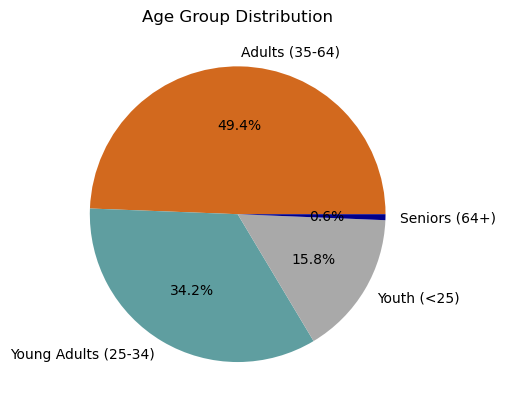

In [30]:
Age_Group=ab['Age_Group'].value_counts()
Age_Group
plt.pie(Age_Group.values, labels=Age_Group.index, colors=["chocolate", "cadetblue", "darkgrey", "darkblue"], autopct='%1.1f%%')
plt.title('Age Group Distribution')
plt.show()

The age group "Adult(35-64)" has the highest distribution of 49.4% and the "Seniors(64+)" being the least with distribution of 0.6%

### Which Age_Group is generating the highest profit?

Text(0.5, 1.0, 'Profit by Age_Group')

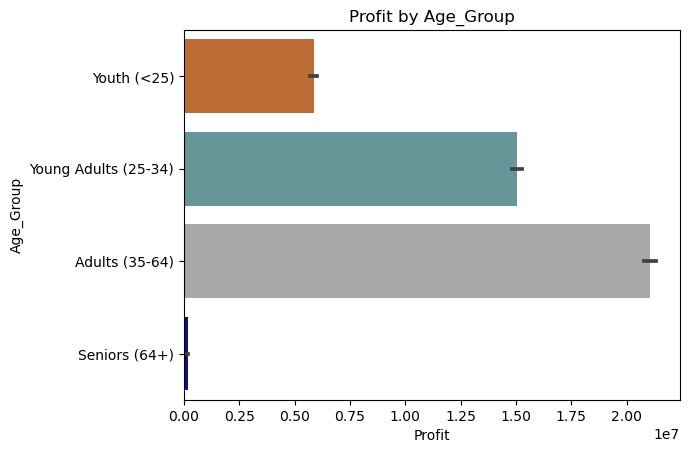

In [31]:
sns.barplot(ab, x= ab["Profit"], y=ab["Age_Group"], estimator=sum, palette=["chocolate", "cadetblue", "darkgrey", "darkblue"])
plt.title("Profit by Age_Group")

The overall highest profit is generated by the Age_Group Adults(35-64)
This can be due to the fact that this age group has the highest distribution.

### Which product has the highest quantity order in each age group?

Text(0.5, 1.0, 'Product order quantity by Age Group')

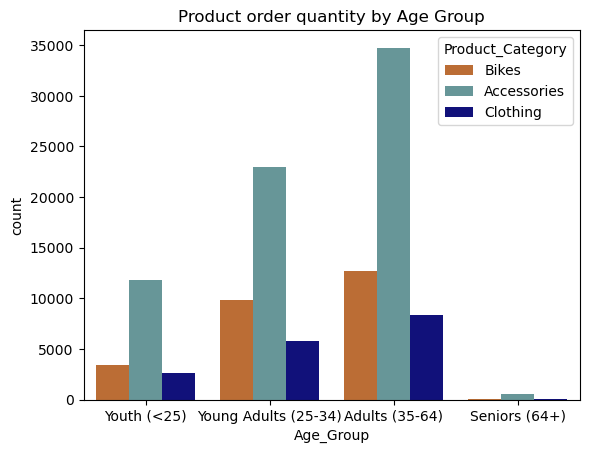

In [32]:
sns.countplot(ab, x= ab["Age_Group"],  hue= ab["Product_Category"], palette=["chocolate", "cadetblue", "darkblue"])
plt.title("Product order quantity by Age Group")

Accessories is seen to have the highest quantity order across all age groups.
Bike takes the second position in orders accross all age groups
Clothes are the least in order
It can be noted that among the Youth(<25), accessories and clothes almost equal ratio of order

### How is the Age_Group distributed in each country?

Text(0.5, 1.0, 'Age_Group Distribution by Country')

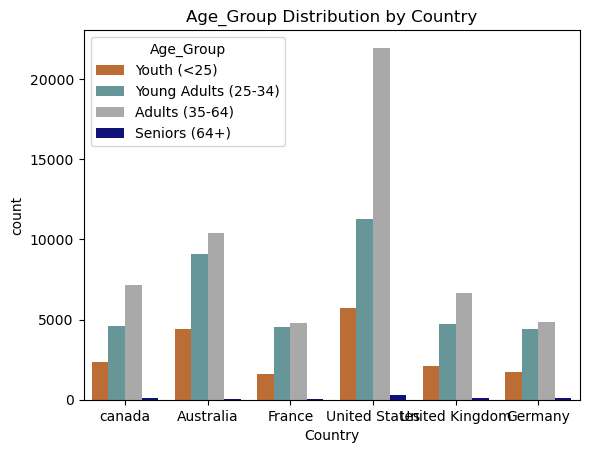

In [33]:
sns.countplot(ab, x= ab["Country"],  hue= ab["Age_Group"], palette=["chocolate", "cadetblue", "darkgrey", "darkblue"])
plt.title("Age_Group Distribution by Country")

From the analysis, it is clear that in every country represented here, the Age_Group Adults(35-64) has the highest number and the Seniors(64+) is the least.
United states has the highest number of each age_group compared to other countries, with the highest of it all being the adults(35-64)

### Which Country generated the highest revenue?

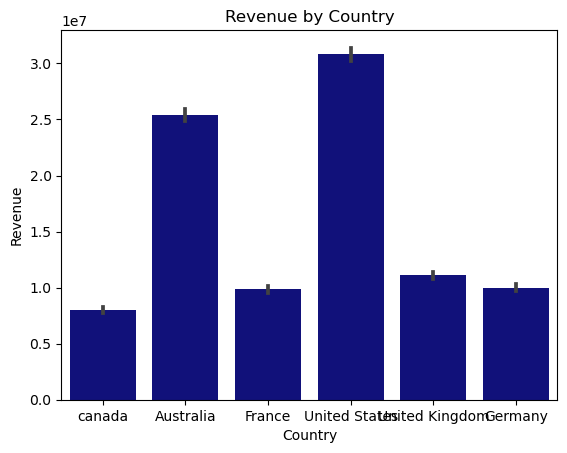

In [35]:
sns.barplot(x="Country", y="Revenue", data=ab, estimator=sum, color="darkblue")
plt.title("Revenue by Country")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.show()


From the visualization, United States is seen to generate the highest revenue while Cananda generates the lowest revenue.

### How is the product Profit by Country?

Text(0.5, 1.0, 'Product profit by')

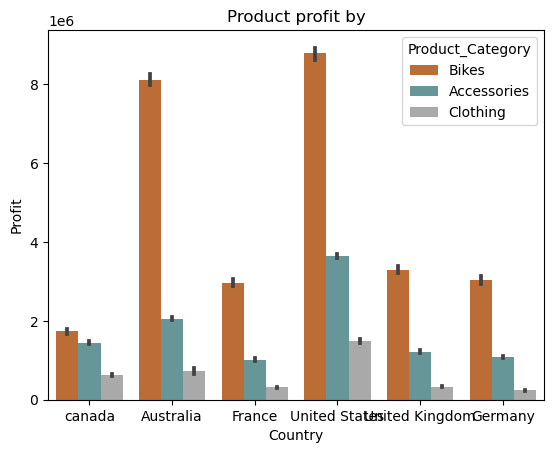

In [13]:
sns.barplot(ab, x=ab["Country"], y=ab["Profit"], hue=ab["Product_Category"], estimator=sum, palette=["chocolate", "cadetblue", "darkgrey"])
plt.title("Product profit by")

Bike is seen to be generating the highest profit across all countries followed by accessories and lastly clothing.
It is also notable that in United States all products are generating higher profit as compared to other products in other countries.

### Does the Product Category with the higher Order Quantity have the higher Profit?

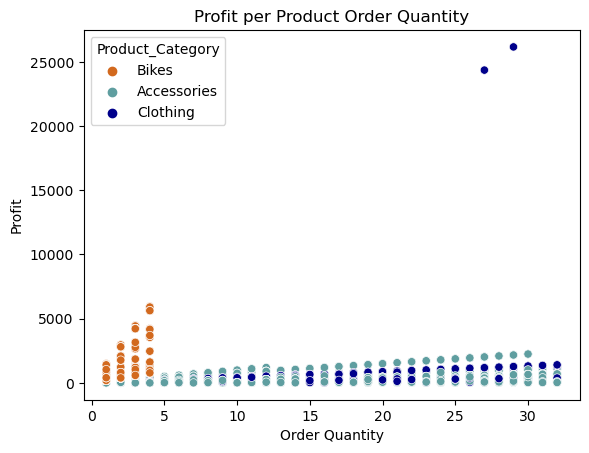

In [25]:
sns.scatterplot(x="Order_Quantity", y="Profit", hue="Product_Category", palette=["chocolate", "cadetblue", "darkblue"], data=ab)
plt.title("Profit per Product Order Quantity")
plt.xlabel('Order Quantity')
plt.ylabel('Profit')
plt.show()

From this analysis we can see that the bike has the lowest Order Quantity while the Accessories and the Clothes has higher Order Quantity.
However it is notable that it is not the product with the highest Order Quantity that generates the highest profit as we can see the bike with the lowest Order Quantity is generating the highest Profit


### Which product made the highest profit?

Text(0, 0.5, 'Profit')

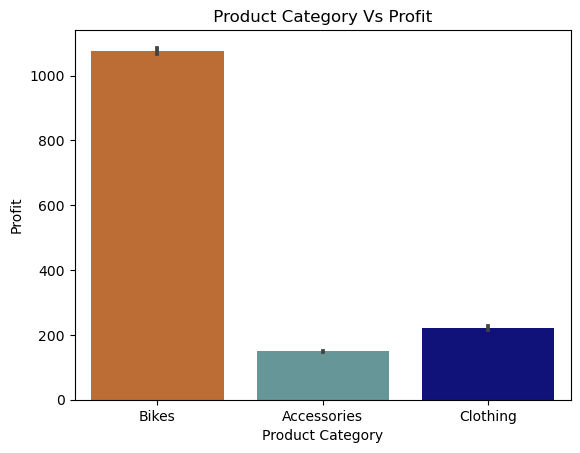

In [27]:
sns.barplot(x = "Product_Category", y="Profit",  palette=["chocolate", "cadetblue", "darkblue"], data = ab)
plt.title(" Product Category Vs Profit ")
plt.xlabel("Product Category")
plt.ylabel("Profit")

Bikes made the highest profit and accessories made the least profit

### How is the profit margin per given product category?

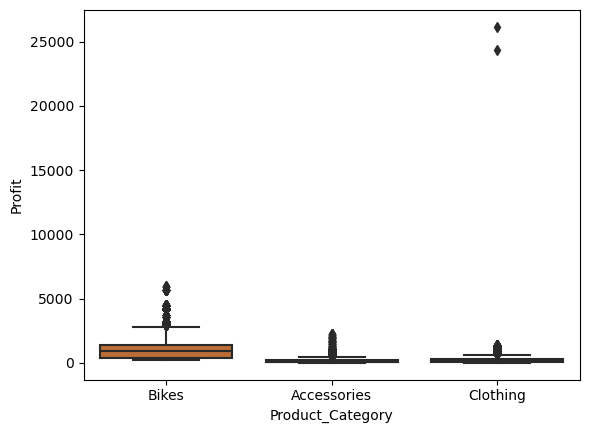

In [28]:
category_column="Product_Category"
numerical_column="Profit"

sns.boxplot(x=category_column, y=numerical_column, data=ab, palette=["chocolate", "cadetblue", "darkblue"])

plt.show()

Procuct catagory Bike is seen to have the highest profit margin

### Here are the key findings from the analysis:

The adult age group (35-64) is widely distributed across all countries, while seniors (64+) show the least distribution.

Profit generation varies across different age groups, with the highest profits coming from the adult age group (35-64).

The United States exhibits a significant distribution of all age groups and emerges as the top revenue and profit generator, likely due to its diverse age demographic.

Interestingly, the product category with the highest order quantity doesn't necessarily correlate with the highest sum profit. For instance, the bike category, despite having the lowest order quantity, yields the highest sum profit, likely attributed to its high-profit margin.

### Based on the insights gathered, here are some recommendations for the company:

#### Tailor Marketing Strategies for Different Age Groups
Utilize social media and  influencer marketing to target younger demographics.
By customizing marketing messages to cater to the specific preferences and needs of each age group, the company can enhance conversion rates, leading to increased sales.

#### Enhance Customer Loyalty through Personalization:
Offer personalized customer experiences tailored to different age groups.
This approach can foster stronger relationships with customers and increase their loyalty to the brand.

#### Improve Engagement with Targeted Marketing:
Craft marketing messages that resonate with each age groups interests and pain points.
By addressing the unique needs of different demographics, the company can boost customer engagement and satisfaction.

#### Focus Marketing Efforts on the United States:
Given the highest distribution of all age groups and the highest revenue and profit generation in the United States, prioritize marketing strategies in this market.
Allocate resources to capitalize on the strong presence and potential for growth in this region.

#### Maximize Profits by Prioritizing High-Profit Margin Products:
Recognize the significance of profitability in determining the value of the business.
Focus on selling products with high-profit margins, such as bikes, to maximize overall profitability and drive future growth.